# Condiciones de aceptabilidad de modelos con polítropa Maestra
## Variando el índice polítropo $n$

Este cuaderno muestra gráficamente, para distintos valores del índice polítropo $n$, el cumplimiento (o no) de condiciones de aceptabilidad física en esferas anisótropas relativistas con ecuación de estado polítropa maestra.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import solve_ivp

In [2]:
plt.rc('text', usetex = True)
plt.rc('font', **{'family' : "sans-serif"})
params = {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

# Modelado de objetos compactos

## Ecuaciones de estructura

Las ecuaciones de estructura son el resultado de manipular las ecuaciones de campo de Einstein para una métrica y un tensor de energía dado, y son las ecuaciones que hay que resolver para modelar objetos compactos. En el caso de configuraciones estáticas con simetría esférica y anisotropía en la presión, las ecuaciones de estructura consisten en

\begin{eqnarray}
P^{\prime} &=& - \left(\rho + P \right) \frac{m + 4 \pi r^{3} P}{r(r - 2m)} + \frac{2}{r} \left(P_{\perp} - P \right)  \label{EqHid} \tag{1} \\
m^{\prime} &=& 4 \pi r^{2} \rho \label{MasDif} \tag{2}
\end{eqnarray}
donde $\rho$ es densidad de energía, $m$ es masa, $P$ es presión radial, $P_{\perp}$ es presión tangencial y la prima denota derivada respecto a $r$.

## Ecuación de Estado

Una ecuación de estado (EoS por sus siglas en inglés) es un modelo matemático, entre variables de estado, que describe los procesos físicos más importantes que ocurren en un sistema termodinámico.

La EoS polítropa maestra consiste en una relación tal que
\begin{equation}
P = \kappa \rho^{1+\frac{1}{n}} + \alpha \rho - \beta \,. \label{PoliMaestra} \tag{3}
\end{equation}

Por otra parte, se supone que la anisotropía en a presión es de la forma
\begin{equation}
\Delta\equiv P_{\perp} - P = C r (\rho + P) \frac{m + 4 \pi r^3 P}{r(r-2m)} \,, \label{Anisotropia} \tag{4}
\end{equation}
tal que la ecuación (1) queda como
\begin{equation}
\frac{\mathrm{d}P}{\mathrm{d}r} = - h \frac{(\rho + P)(m + 4 \pi  r^3 P)}{r(r-2m)} \,, \label{EqHidCos} \tag{5}
\end{equation}
donde $h = 1 - 2C$, y $C$ cuantifica la anisotropía en el modelo.

## Ecuación de Lane-Emden

Las ecuaciones de estructura pueden escribirse de forma adimensional cuando son dotadas de EoS polítropas. El resultado es conocido como ecuación de Lane-Emden, dada por el cambio de variables
\begin{equation}
\Psi^{n}(\xi) = \frac{\rho}{\rho_{c}} \ , \ \ \eta \left(\xi \right) = \frac{m}{4 \pi \rho_c a^{3}} \quad \textrm{y} \quad r = a\xi \,,
\end{equation}
donde
\begin{equation}
a^{2} = \frac{\Upsilon \left(n + 1 \right)}{4 \pi \rho_c} \ , \ \ \Upsilon = \kappa \rho_{c}^{1/n} = \frac{\sigma - \alpha \left(1 - \varkappa \right)}{1 - \varkappa^{1 + \frac{1}{n}}} \ , \ \ \sigma = \frac{P_{c}}{\rho_{c}} \quad \textrm{y} \quad \varkappa = \frac{\rho_{b}}{\rho_{c}} \,.
\end{equation}
Los subíndices $c$ y $b$ indican que la variable es evaluada en el centro y borde de la configuración, respectivamente.

De esta manera, las EoS $\eqref{PoliMaestra}$ y $\eqref{Anisotropia}$ adimensionales son
\begin{eqnarray}
P &=& \rho_c \left\{\Upsilon \left( \Psi^{n+1} - \varkappa^{1 + \frac{1}{n}} \right) + \alpha \left(\Psi^{n} - \varkappa \right)\right\}  = \rho_c \mathcal{P} \quad \textrm{y} \label{PAdi} \tag{6} \\
\Delta &=& \frac{C \Upsilon (n+1) \left(\eta + \xi^{3} \mathcal{P} \right) \left(\Psi^{n} + \mathcal{P} \right) \rho_{c}}{\xi - 2  \Upsilon \left( n+1 \right) \eta} \,, \label{AniAdi} \tag{7}
\end{eqnarray}
respectivamente.


Finalmente, las ecuaciones $\eqref{EqHidCos}$ y $\eqref{MasDif}$, escritas en su forma adimensional, son
\begin{eqnarray}
\dot{\Psi} &=& - \frac{h \left(\eta + \xi^{3} \mathcal{P}\right) \left(1 + \frac{\mathcal{P}}{\Psi^{n}}\right)}{\xi \left\{\xi-2\,\Upsilon\,\left( n+1 \right) \eta\right\} \left\{1 + \frac{\alpha n}{\Upsilon \left(n+1\right) \Psi}\right\}}  \qquad \textrm{y} \label{PsiPunto} \tag{8} \\
\dot{\eta} &=& \xi^{2}\Psi^{n} \,, \label{EtaPunto} \tag{9}
\end{eqnarray}
donde el punto indica derivada respecto de $\xi$.

Por lo tanto, el sistema de ecuaciones a integrar numéricamente está dado por $\eqref{PsiPunto}$ y $\eqref{EtaPunto}$, con condiciones iniciales
\begin{equation}
\Psi (\xi = 0) = \Psi_{c} = 1 \,, \quad \eta (\xi = 0) = \eta_{c} = 0  \,,
\end{equation}
y con condición de frontera
\begin{equation}
\Psi (\xi = \xi_{b}) = 0 \,.
\end{equation}

In [3]:
# Definiendo sistema de ecuaciones: derivada de Psi y derivada de Eta en función de xi
def funciones(xi,y, alpha, n, h, Upsilon, varkappa):
    psi_ , eta_ = y
    dydxi = [-h*(eta_ + xi**(3)*(Upsilon*(psi_**(n+1)-varkappa**(1+1/n)) + alpha*(psi_**(n) - varkappa)))*(1 + Upsilon*(psi_ - (varkappa**(1+1/n)/psi_**(n))) + alpha*(1 - (varkappa/psi_**(n))))/xi/(xi - 2*Upsilon*(n+1)*eta_) /(1 + alpha*n/Upsilon/(n+1)/psi_) 
            ,xi**(2)*psi_**(n)] 
    return dydxi

In [4]:
c = 2.997*10**(8)          # Velocidad de la luz en unidades S.I.
G = 6.673*10**(-11)        # Constante de gravitación universal en unidades S.I.
Msun = 1.989*10**(30)      # 1 Masa solar en kilogramos

### $Modelo\ Genérico: M = 1.5 \, M_{\odot}, \, R = 10.0 \, km$

Parámetros de entrada

$n = 0.8 \, ; \, C = 0.05 \, ; \, \alpha = -0.01 \, ; \, \varkappa = 0.2 \, ; \, \sigma = 0.2 \, ; \, \rho_c = 1.5\times10^{18} \, kg/m^{3}  $ 

In [5]:
# Se definen los parámetros (de entrada) que caracterizan a cada modelo: n, C, alpha, varkappa, sigma

Lista_n = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0]        # Lista de índices polítropos n
print('Valores de n: ',end='')                                                    
print(*Lista_n, sep=', ')

C = 0.05 # Valor del factor de anisotropía

h = 1 - 2*C  

alpha = -0.01 # valor del factor del término lineal

varkappa = 0.2 # Razón entre densidad en el borde y densidad central

sigma = 0.2 # Presión central entre densidad central

Valores de n: 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0


In [6]:
ListaModelos = [] # Contenedor de las soluciones para cada índice polítropo n

In [7]:
%%time

for i in range(len(Lista_n)):
    
    n = Lista_n[i]
    
    # Cálculo de Upsilon
    Upsilon = (sigma - alpha*(1 - varkappa))/(1 - varkappa**(1 + 1/n)) 
        
    # Condiciones iniciales
    Psi0 = 1.0
    Eta0 = 0.0
    y0 = [Psi0,Eta0]
    
    # Intervalo de integración
    xi0 = 10**(-15) # Inicio
    ximax = 1000   # Fin, en caso de que la condición para detener la integración no se cumpla
    xi_span = (xi0,ximax) # Espacio de integración

    # Condición para detener la integración (Presión adimensional menor que 10**(-15))
    def stop_condition(xi,y,alpha, n, h, Upsilon, varkappa):
        return (1/sigma)*(Upsilon*(y[0]**(n+1) - varkappa**(1 + 1/n)) + alpha*(y[0]**(n) - varkappa)) - 10**-15
    stop_condition.terminal = True

    # Solución del sistema de ecuaciones utilizando la rutina "solve_ivp" por medio del método RK45
    # solve_ivp(Ecuaciones a integrar, Espacio de integración, Condiciones iniciales, Método de integración,
    #           Condición para detener la integración)
    soluciones = solve_ivp(funciones,xi_span,y0,method='RK45',events=stop_condition,
                           args=(alpha, n, h, Upsilon, varkappa),max_step=1/50)
    xi = soluciones.t
    Psi = soluciones.y[0]
    Eta = soluciones.y[1]
    Psi1 = -h*(Eta+ xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(1 + Upsilon*(Psi - (varkappa**(1 + 1/n)/Psi**(n))) + alpha*(1 - (varkappa/Psi**(n))))/xi/(xi - 2*Upsilon*(n+1)*Eta) /(1 + alpha*n/Upsilon/(n+1)/Psi)
    Eta1 = xi**(2) * Psi**(n)
    
    #########################################################################################################################
   

    # Xi normalizada
    xiNorm = xi/xi[-1]
    
    mr = 2*Upsilon*(n+1)*Eta/xi                                           # 2*G*m/c**(2)/r
    
    Densidad = Psi**(n)
    
    varP = Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)
    
    # Presión entre presión central
    PNorm = (1/sigma)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))
    
    # Presión tangencial
    PTNorm = C*Upsilon*(n+1)*(Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(Psi**(n) + (Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))/sigma/(xi - 2*Upsilon*(n+1)*Eta) + (Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))/sigma
    
    # Gradiente de densidad
    Dprima = n*Psi**(n-1)*Psi1   
    
    # Gradiente de presión radial
    Pprima = (1/sigma)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/(n+1)/Upsilon/Psi)
    
    # Gradiente de presión tangencial
    Ptprima = (1/sigma)*(C*Upsilon*(n+1)*(((Eta1 + 3*xi**(2)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)) + xi**(3)*Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(Psi**(n) + Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(n*Psi**(n-1)*Psi1 + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi)))/(xi - 2*Upsilon*(n+1)*Eta) - (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(Psi**(n) + Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))*(1 - 2*Upsilon*(n+1)*Eta1)/(xi - 2*Upsilon*(n+1)*Eta)**(2)) + Upsilon*(n+1)*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))
    
    # Condición de energía fuerte (SEC)     
    SEC = (1/sigma)*Densidad - PNorm - 2*PTNorm
    
    # Velocidad del sonido radial al cuadrado
    v2r = Upsilon*(1 + 1/n)*Psi + alpha # Velocidad del sonido al cuadrado
    
    # Diferencia de las velocidades del sonido al cuadrado
    vDelta2 = (C*Upsilon*(n+1)/(xi - 2*Upsilon*(n+1)*Eta))*((1 + Upsilon*(n+1)*Psi/n + alpha)*(Eta + xi**(3)*varP) + (Psi**(n) + varP)*xi**(2)*Psi*((Psi**(n) + 3*varP)/n/Psi**(n)/Psi1 + (xi/Psi)*((Upsilon*(n+1)*Psi)/n + alpha)) - Psi*(Psi**(n) + varP)*(Eta + xi**(3)*varP)*(1 - 2*Upsilon*(n+1)*xi**(2)*Psi**(n))/(n*Psi**(n)*Psi1*(xi - 2*Upsilon*(n+1)*Eta)))
    
    # Velocidad del sonido tangencial al cuadrado
    v2t = vDelta2 + v2r
    
    # Índice adiabático Gamma
    Gamma = v2r*(Densidad + sigma*PNorm)/PNorm/sigma
    
    # Segunda derivada de Psi
    Psi11 = -(h/xi/(xi - 2*Upsilon*(n+1)*Eta)/(1 + alpha*n/Upsilon/(n+1)/Psi))*((Eta1 + 3*xi**(2)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)) + xi**(3)*(n+1)*Upsilon*Psi**(n)*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi))*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n))) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1+ 1/n)) + alpha*(Psi**(n) - varkappa)))*((n+1)*Upsilon*Psi1*(1 + alpha*n/Upsilon/(n+1)/Psi) - n*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))*Psi1/Psi**(n+1)) + (Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(1 + Upsilon*(Psi - varkappa**(1 + 1/n)/Psi**(n)) + alpha*(1 - varkappa/Psi**(n)))*((2*Upsilon*(n+1)*Eta1 - 1)/(xi - 2*Upsilon*(n+1)*Eta) + alpha*n*Psi1/(1 + alpha*n/Upsilon/(n+1)/Psi)/Upsilon/(n+1)/Psi**(2) - 1/xi))    
    
    # Fracturas: deltaR1: Densidad, deltaR2: Masa, deltaR3: Presión, delta R4: Gradiente de presión   
    deltaR1 = h*Upsilon*(n+1)*(Eta + xi**(3)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))/xi/(xi - 2*Upsilon*(n+1)*Eta)
    deltaR2 = h*Upsilon*(n+1)*xi**(2)*Psi*(Psi**(n) + (Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa)))*(1 + 2*Upsilon*(n+1)*(Upsilon*(Psi**(n+1) - varkappa**(1 + 1/n)) + alpha*(Psi**(n) - varkappa))*xi**(2))/n/Psi1/(xi - 2*Upsilon*(n+1)*Eta)**(2)
    deltaR3 = h*Upsilon*(n+1)*(Eta + xi**(3)*(Psi**(n) + 2*(Upsilon*(Psi**(n+1) - varkappa**(1+1/n)) + alpha*(Psi**(n) - varkappa))))*(Upsilon*(n+1)*Psi/n + alpha)/(xi*(xi - 2*Upsilon*(n+1)*Eta))
    deltaR4 = Upsilon*(n+1)*(n*Psi1**(2) + Psi*Psi11)/n/Psi1 + alpha*((n-1)*Psi1**(2) + Psi*Psi11)/Psi/Psi1
    
    deltaRMaster = deltaR1 + deltaR2 + deltaR3 + deltaR4
     
    # Flotabilidad
    Psin11 = n*(Psi**(n-1)*Psi11 + (n-1)*Psi**(n-2)*Psi1**(2))
                
                           #0    #1     #2       #3     #4      #5      #6      #7     #8    #9  #10        
    ListaModelos.append([xiNorm, mr, Densidad, PNorm, PTNorm, Dprima, Pprima, Ptprima, SEC, v2r, v2t,
                          #11        #12        #13
                         Gamma, deltaRMaster, Psin11])

Wall time: 922 ms


In [8]:
LineStyles = ['solid', 'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1)),
             'solid', 'dotted', 'dashed', 'dashdot', (0,(1,10)), (0,(5,10)), (0,(3,10,1,10)), (0,(3,1,1,1,1,1))]

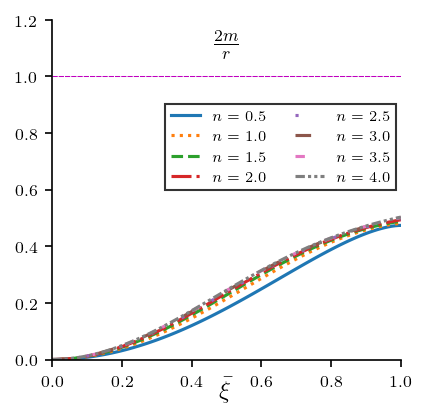

In [9]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][1],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.2)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{2m}{r}$', x=0.5,y=0.85,fontsize=12)
ax1.legend(ncol=2, loc=(0.325,0.5),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

ax1.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

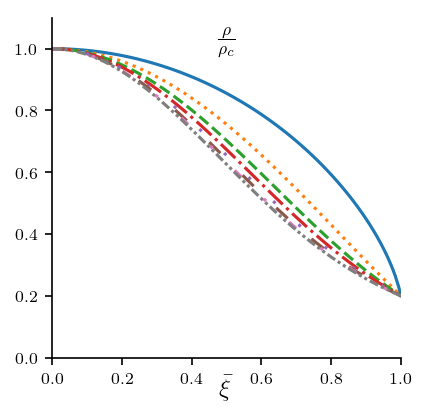

In [10]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][2],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\rho}{\rho_{c}}$', x=0.5,y=0.85,fontsize=12)
# ax1.legend(ncol=2, loc=(0.325,0.5),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

plt.show()

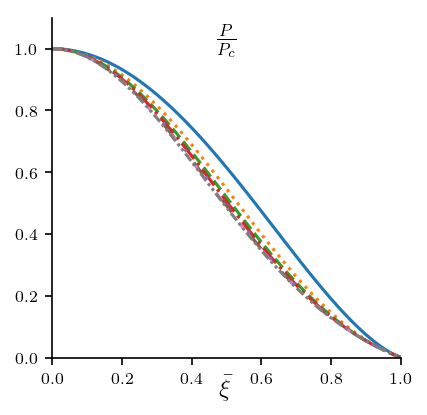

In [11]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][3],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{P}{P_{c}}$', x=0.5,y=0.85,fontsize=12)
# ax1.legend(ncol=2, loc=(0.325,0.5),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

plt.show()

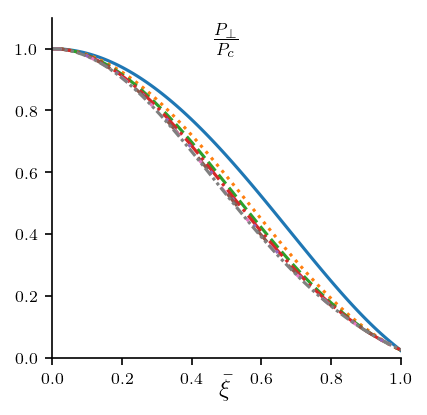

In [12]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][4],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{P_{\perp}}{P_{c}}$', x=0.5,y=0.85,fontsize=12)
# ax1.legend(ncol=1, loc=3,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

plt.show()

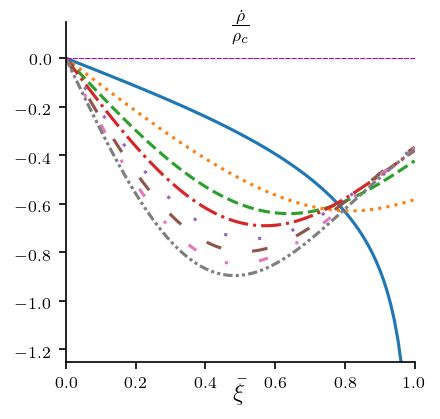

In [13]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][5],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-1.25,0.15)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\dot{\rho}}{\rho_{c}}$', x=0.5,y=0.9,fontsize=12)
# ax1.legend(ncol=1, loc=3,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

ax1.axhline(y=0.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

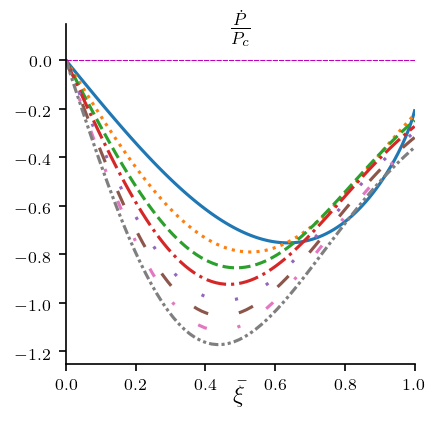

In [14]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][6],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-1.25,0.15)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\dot{P}}{P_{c}}$', x=0.5,y=0.9,fontsize=12)
# ax1.legend(ncol=1, loc=3,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')

ax1.axhline(y=0.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

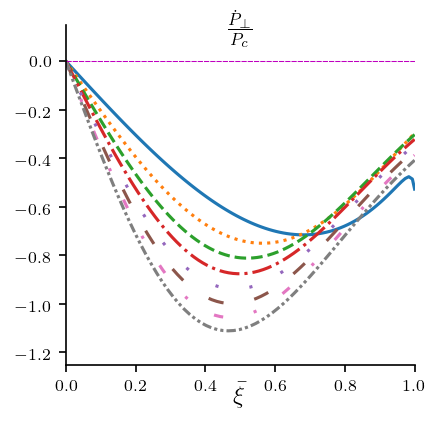

In [15]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][7],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-1.25,0.15)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\dot{P}_{\perp}}{P_{c}}$', x=0.5,y=0.9,fontsize=12)
# ax1.legend(ncol=2, loc=4,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

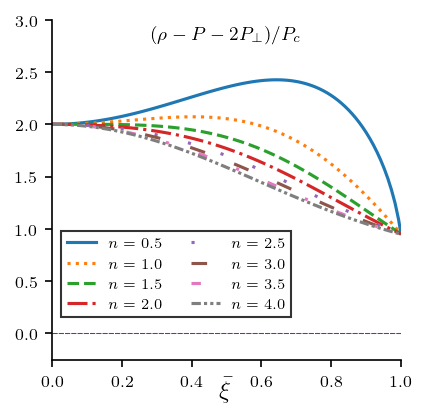

In [16]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][8],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-0.25,3.0)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$(\rho - P - 2P_{\perp})/P_{c}$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=2, loc=(0.025,0.125),fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

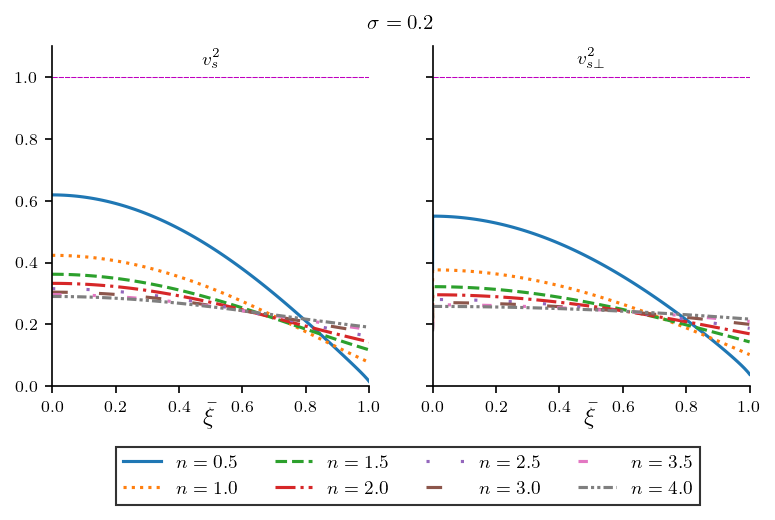

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(6,3),dpi=150)
fig.suptitle(r'$\sigma = {}$'.format(sigma),x=0.5125,y=0.95,fontsize=10)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][9],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    ax2.plot(ListaModelos[i][0],ListaModelos[i][10],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,1.1)
ax2.set_xbound(0.0,1.0)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax2.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax2.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$v^{2}_{s}$', x=0.5,y=0.9,fontsize=9)
ax2.set_title(r'$v^{2}_{s \perp}$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=4, loc=(0.2,-0.35),edgecolor='k',fancybox=False,fontsize=9)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')

ax1.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)
ax2.axhline(y=1.0,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

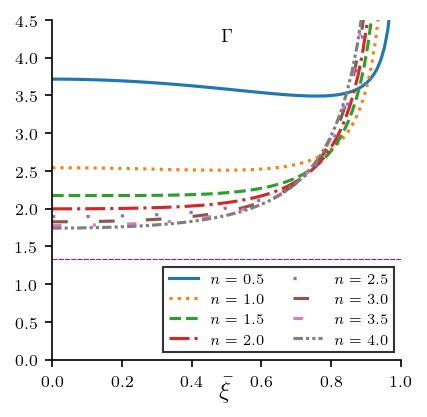

In [18]:
fig, ax1 = plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][11],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))

ax1.set_xbound(0.0,1.0)
ax1.set_ybound(0.0,4.5)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\Gamma$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=2, loc=4,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=4/3,color='m',linestyle=(0,(5,1)),linewidth=0.5)

plt.show()

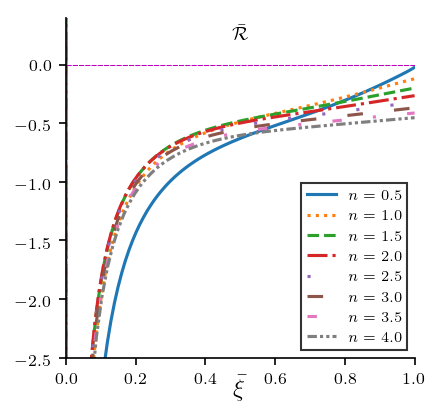

In [19]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][12],linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-2.5,0.4)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\bar{\mathcal{R}}$', x=0.5,y=0.9,fontsize=9)
ax1.legend(ncol=1, loc=4,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)


plt.show()

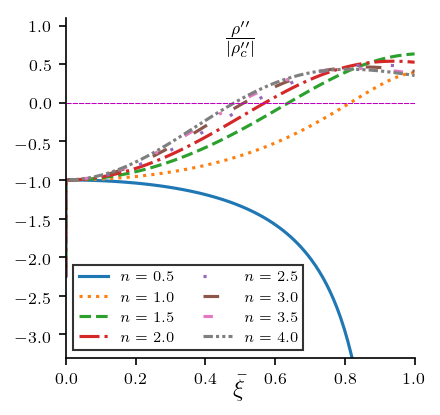

In [20]:
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(3,3),dpi=150)

for i in range(len(Lista_n)):
    
    ax1.plot(ListaModelos[i][0],ListaModelos[i][13]/abs(ListaModelos[i][13][1]),linestyle=LineStyles[i],label=r'$n = %.1f$'%(Lista_n[i]))
    
ax1.set_xbound(0.0,1.0)
ax1.set_ybound(-3.3,1.1)
ax1.set_xlabel(r'$\bar{\xi}$',fontsize=12)
ax1.xaxis.set_label_coords(0.5, -0.05)
ax1.set_title(r'$\frac{\rho^{\prime \prime}}{|\rho^{\prime \prime}_{c}|}$', x=0.5,y=0.85,fontsize=12)
ax1.legend(ncol=2, loc=3,fontsize=7,edgecolor='k',fancybox=False)
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.axhline(y=0,color='m',linestyle=(0,(5,1)),linewidth=0.5)


plt.show()